# Frequency Domain

Okay now stuff actually gets a little tricky so I'll have to be a bit more serious sadly.

## The Laplace (and Fourier) Transform is a godsent

### Transform of arbitrary signals

Suppose you have a time-varying signal $u(t)$, then there exists its Laplace or Fourier transform $U(s)$, where $s = \sigma + i\omega$ for the Laplace transform and $s = i\omega$ for the Fourier transform.



These transforms are defined as

$$\mathcal{L}\{u(t)\}(s) = U(s) = \int_{0}^\infty u(t) e^{-st} \text{d}t,\; s \in \mathbb{C}$$

and

$$\mathcal{F}\{u(t)\}(\omega) = U(\omega) = \int_{-\infty}^\infty u(t) e^{-i\omega t} \text{d}t,\; \omega \in \mathbb{R}.$$

And now you know why it's called the frequency domain: $\mathfrak{Re}(e^{-st})$ is a (dampened) oscillation! To be completely honest, this is *way* too big of a subject for me to explain. However, I don't have to because of legends like 3Blue1Brown, go watch these if you want to know more:

- [watch this video on what Fourier transforms are](https://www.youtube.com/watch?v=r6sGWTCMz2k)

- [and this one on Laplace transforms.](https://www.youtube.com/watch?v=FE-hM1kRK4Y)

- [Just watch his playlist on differential equations really, the man's a treasure.](https://www.youtube.com/playlist?list=PLZHQObOWTQDNPOjrT6KVlfJuKtYTftqH6)



But if you don't care about all that and just want to apply it, you need these key fact for the next derivation:

- The Fourier transform is very related to the Laplace transform and most things work for both so I'll just continue with the Laplace transform for now,

- These transforms basically say that **any** time signal is a sum of (dampened) sinusoids,

- Both transforms are linear.

- Derivatives and integrations are also linear operators.

- The order in which you apply linear operators doesn't matter.



Furthermore, some interesting mathematical fact: starting with the definition again

$$\mathcal{L}\{u(t)\}(s) = U(s) = \int_{0}^\infty u(t) e^{-st} \text{d}t,\; s \in \mathbb{C}$$

and integrating by part [(trust me bro)](https://en.wikipedia.org/wiki/Integration_by_parts)

$$ \mathcal{L}\{u(t)\}(s) = \left[\frac{u(t) e^{-st}}{-s} \right]_{0}^\infty + \int_{0}^\infty\frac{1}{s}  \frac{\text{d} u(t)}{\text{d}t} e^{-st} \text{d}t $$

$$ \qquad\qquad = -\frac{u(0) e^{0}}{-s} + \frac{1}{s} \mathcal{L}\left\{\frac{\text{d} u(t)}{\text{d}t}\right\}(s) $$

$$ \qquad\qquad = \frac{1}{s}u(0) + \frac{1}{s} \mathcal{L}\left\{\frac{\text{d} u(t)}{\text{d}t}\right\}(s) $$

$$ \implies U(s) = \frac{1}{s} \frac{\text{d} }{\text{d}t}U(s) + \frac{1}{s}u(0) $$

$$ \implies sU(s) = \frac{\text{d} }{\text{d}t}U(s) + u(0) $$

... Amazing right! No but really this shows two major properties of the Laplace transform:

$$ sU(s) = \frac{\text{d} }{\text{d}t}U(s) + u(0) \implies \frac{\text{d}}{\text{d}t} U(s) = s U(s) - u(0),$$

giving us the first amazing result about time derivatives. If we integrate both sides in time, we get the second amazing result about time integration

$$ \int sU(s) \text{d}t = \int \frac{\text{d} }{\text{d}t}U(s) + u(0) \text{d}t \implies \int sU(s) \text{d}t = U(s) + u(0)t \implies \int U(s) \text{d}t = \frac1s U(s) + \frac1s u(0)t .$$

Then doing a pro engineering move: unless otherwise specified we'll neglect the terms $u(0)$ and $u(0)t$. We are then left with

$$ \frac{\text{d}}{\text{d}t} U(s) = s U(s) \text{, and} $$

$$ \int U(s) \text{d}t = \frac{1}{s} U(s),$$

which are *beautiful*. As you'll see now!

### Transfer functions

Going back to the basics: the state space in time domain.

$$ \dot x = Ax + Bu, $$

$$ y = Cx + Du.$$

Now taking that sweet Laplace transform, including the initial value:

$$ s X(s) - x(0) = AX(s) + BU(s), $$

$$ Y(s) = CX(s) + DU(s).$$

This allows us to look at something interesting:

$$\implies (sI -A) X(s) = BU(s) + x(0) \implies X(s) = (sI -A)^{-1} BU(s) + (sI -A)^{-1}x(0) $$

$$ \therefore Y(s) = CX(s) + DU(s) \implies Y(s) = C(sI -A)^{-1} BU(s) + DU(s) + C(sI -A)^{-1}x(0) \implies Y(s) = \underbrace{(C(sI -A)^{-1} B + D)U(s)}_\text{Steady state solution} + \underbrace{C(sI -A)^{-1}x(0)}_\text{Transient}. $$

Just looking at the steady state solution, we can find the ratio between the steady output and steady input, called the *transfer function* $\frac{Y(s)}{U(s)} = G_{yu}(s)$,

$$ \frac{Y(s)}{U(s)} = G_{yu}(s) = C(sI -A)^{-1} B + D.$$

But we don't know what the transient in the time domain is, and I want to know! To find it, I am going to make two statements now that you can either believe or figure out for yourself:

- the steady state solution is the inhomogeneous ODE solution, and

- the transient is the homogeneous ODE solution, and

- the transient is relative to the steady state solution.

Then if we look at the time domain homogeneous solution,

$$\dot{ \tilde x}(t) = A\tilde x(t),\; \tilde x = x_0 - x_\text{ss} \implies \tilde x(t) = e^{At}\tilde x(0) \implies y(t) = Ce^{At}\tilde x(0) \iff e^{At} = \mathcal{L}^{-1}\{(sI -A)^{-1}\}.$$

for $x_\text{ss} = (sI -A)^{-1} B$. In the time domain block you saw how to evaluate $e^{At}$ with a Taylor series.

Enough maths, I want pictures! We'll decompose some step responses.

<IPython.core.display.Javascript object>

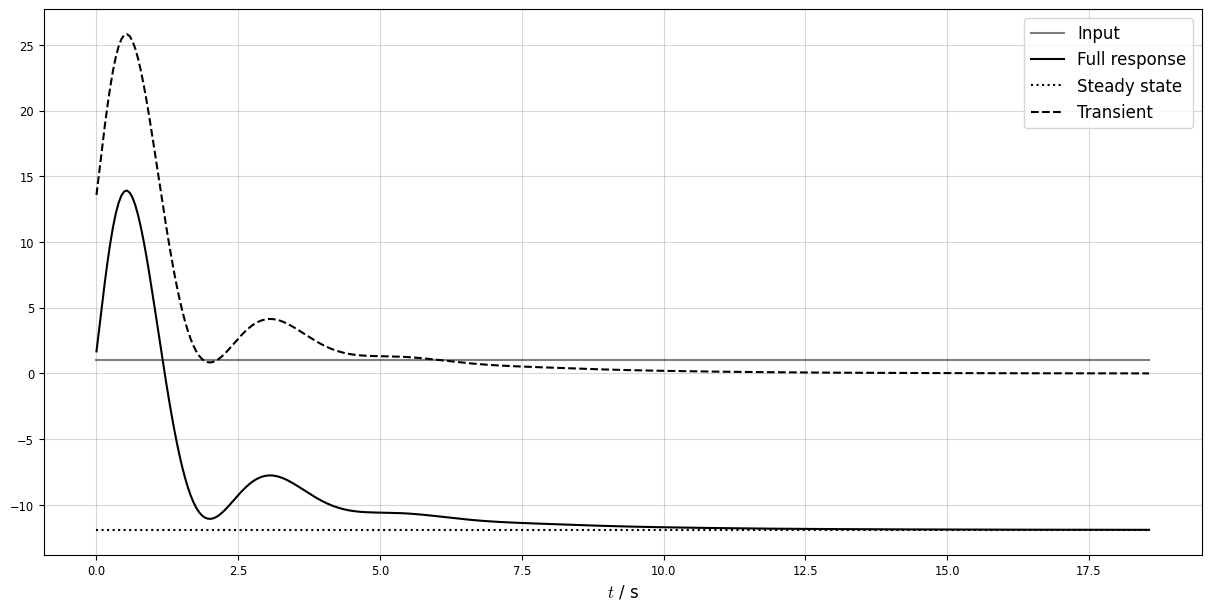

In [105]:
%matplotlib notebook
import numpy as np
from scipy.linalg import expm
import control as cm
import matplotlib.pyplot as plt
from IPython import display
from helperFunctions import *
setPlotStyle()

P = cm.rss(5)

x0 = np.random.randn(P.nstates)
stepres = cm.step_response(P, initial_state=x0)

xss = np.linalg.inv(0*np.eye(P.nstates)-P.A) @ P.B
yss = P.C @ xss + P.D
ytr = [P.C @ expm(P.A * t) @ (x0 - xss.squeeze()) for t in stepres.time ]

fig, ax = plt.subplots()
ax.plot(stepres.time, stepres.inputs, 'k', alpha=.5, label="Input")
ax.plot(stepres.time, stepres.outputs, 'k', label="Full response")
ax.plot(stepres.time, np.ones_like(stepres.time)*yss[0], 'k:', label="Steady state")
ax.plot(stepres.time, np.squeeze(ytr), 'k--', label="Transient")
ax.legend()
ax.set(xlabel="$t$ / s")
display(fig)


Looks cool, I guess... the steady output is a bit boring to be honest. I'm working on adding two more cases: a ramp input and a nonzero mean sinusoid input, but they're not ready yet :(

### ODEs
For actual ODEs the transfer function is found easier, for example a 2nd order system (mass-spring-dampner systems are the textbook example, here with mass position $p$):

$$ m\ddot p + b\dot p + k p = \dot u - q u \overset{\mathcal{L}}{\rightarrow} (ms^2 + bs + k)P(s) = (s - q) U(s).$$

$$ \rightarrow \frac{P(s)}{U(s)} = G_{pu}(s) = \frac{s - q}{ms^2 + bs + k}.$$

Note that I ignored the initial state here, because I only wanted the transfer function.



### Gains, poles and zeros

We are going to look at systems *a lot*, so we need a nice common set of *things* to fully characterise any LTI system. These three magical properties are:

- The gain / steady state gain / DC gain: defined as the value of $G(0)$,

- The poles: the set of $s$-values for which $G(s)$ is not defined, i.e. when $(sI -A)$ is not invertible or a division by 0 happens in the transfer function,

- The zeros: the set of $s$-values for which $G(s) = 0$. (zeros are underrated and you'll see why later)

### Transfer functions for controls

Lets look at a very general control scheme:



![General feedback loop](../figures/CLsys_general.svg)



with the block and signals:

- $F$ : feedforward controller

- $C$ : feedback controller

- $P$ : the plant

- $r$ : reference signal, global input

- $e$ : tracking error

- $u$ : control signal

- $d$ : input disturbance

- $v$ : disturbed input

- $\eta$ : plant output

- $n$ : output disturbance

- $y$ : disturbed output, global output



I'm sure you're now able to do this, but I'll do it for you, the algebraic expressions for the error and output are

$$ e = \frac{F}{1 + PC} r + \frac{-1}{1 + PC} n + \frac{-P}{1 + PC} d = G_{er}r + G_{en}n + G_{ed}d \text{, and}$$

$$ y = \frac{PCF}{1 + PC} r + \frac{1}{1+PC} n + \frac{P}{1 + PC} d  = G_{yr}r + G_{yn}n + G_{yd}d.$$

You might recognise the fractions as transfer functions and this reveals the robust control problem they might tackle in the master course: how to reject noise, but follow the reference?



<div style="text-align:center;background-color:tomato;">End of lecture "Transfer Functions"</div>